# Simple Binary Example 

## With 0.5 Threshold

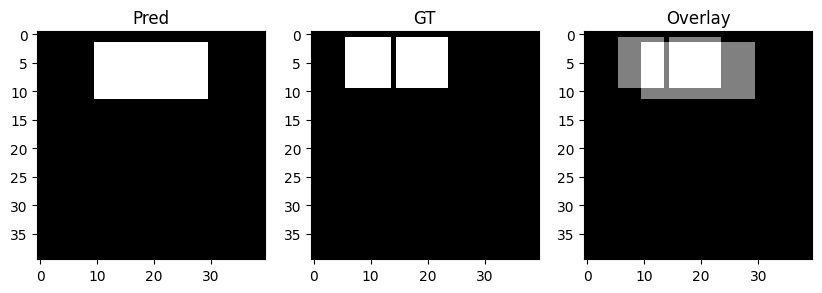

In [1]:
#Imports
import numpy as np

from rich import print as pprint
from panoptica import (
    InputType,
    Panoptica_Evaluator,
    ConnectedComponentsInstanceApproximator,
    NaiveThresholdMatching, HungryMatching
)

# Create empty arrays
pred = np.zeros((40, 40))
gt = np.zeros((40, 40))

# Reference objects (ground truth)
gt[1:10, 6:14] = 1
gt[1:10, 15:24] = 1

pred[2:12, 10:30] = 1

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(pred, cmap='gray')
ax[0].set_title('Pred')
ax[1].imshow(gt, cmap='gray')
ax[1].set_title('GT')
ax[2].imshow(pred + gt, cmap='gray')
ax[2].set_title('Overlay')
plt.show()

In [2]:
# Convert pred and gt to integer type AFTER assignment
pred = pred.astype(np.int32)
gt = gt.astype(np.int32)

# NAIVE Matching
naive_evaluator = Panoptica_Evaluator(
    expected_input=InputType.SEMANTIC,
    instance_approximator=ConnectedComponentsInstanceApproximator(),
    instance_matcher=NaiveThresholdMatching(matching_threshold=0.5),
)

print("Naive Matching")
result = naive_evaluator.evaluate(pred, gt, verbose=False)["ungrouped"]
pprint(result)

# HUNGRY Matching
hungry_evaluator = Panoptica_Evaluator(
    expected_input=InputType.SEMANTIC,
    instance_approximator=ConnectedComponentsInstanceApproximator(),
    instance_matcher=HungryMatching(matching_threshold=0.1),
)
print("\nHungry Matching")
result = hungry_evaluator.evaluate(pred, gt, verbose=False)["ungrouped"]
pprint(result)

Naive Matching


+++ MATCHING +++
Number of instances in reference (num_ref_instances): 2
Number of instances in prediction (num_pred_instances): 1
True Positives (tp): 0
False Positives (fp): 1
False Negatives (fn): 2
Recognition Quality / F1-Score (rq): 0.0

+++ GLOBAL +++
Global Binary Dice (global_bin_dsc): 0.5892351274787535

+++ INSTANCE +++
Segmentation Quality IoU (sq): 0.0 +- nan
Panoptic Quality IoU (pq): 0.0
Segmentation Quality Dsc (sq_dsc): 0.0 +- nan
Panoptic Quality Dsc (pq_dsc): 0.0
Segmentation Quality ASSD (sq_assd): inf +- nan
Segmentation Quality Relative Volume Difference (sq_rvd): nan +- nan


Hungry Matching


+++ MATCHING +++
Number of instances in reference (num_ref_instances): 2
Number of instances in prediction (num_pred_instances): 1
True Positives (tp): 1
False Positives (fp): 0
False Negatives (fn): 1
Recognition Quality / F1-Score (rq): 0.6666666666666666

+++ GLOBAL +++
Global Binary Dice (global_bin_dsc): 0.5892351274787535

+++ INSTANCE +++
Segmentation Quality IoU (sq): 0.3444976076555024 +- 0.0
Panoptic Quality IoU (pq): 0.22966507177033493
Segmentation Quality Dsc (sq_dsc): 0.5124555160142349 +- 0.0
Panoptic Quality Dsc (pq_dsc): 0.3416370106761566
Segmentation Quality ASSD (sq_assd): 2.6724199253921057 +- 0.0
Segmentation Quality Relative Volume Difference (sq_rvd): 1.4691358024691359 +- 0.0

## With 0.1 Threshold

### Notice Naive Matching Breaks

In [5]:
# Convert pred and gt to integer type AFTER assignment
pred = pred.astype(np.int32)
gt = gt.astype(np.int32)

# NAIVE Matching
naive_evaluator = Panoptica_Evaluator(
    expected_input=InputType.SEMANTIC,
    instance_approximator=ConnectedComponentsInstanceApproximator(),
    instance_matcher=NaiveThresholdMatching(matching_threshold=0.1),
)

print("Naive Matching")
result = naive_evaluator.evaluate(pred, gt, verbose=False)["ungrouped"]
pprint(result)

Naive Matching


Exception: You are mapping a prediction label to a reference label that was already assigned differently, got <bound method InstanceLabelMap.__str__ of ['(1,) -> 2']> and you tried [1], 1

In [6]:
# HUNGRY Matching
hungry_evaluator = Panoptica_Evaluator(
    expected_input=InputType.SEMANTIC,
    instance_approximator=ConnectedComponentsInstanceApproximator(),
    instance_matcher=HungryMatching(matching_threshold=0.1),
)
print("\nHungry Matching")
result = hungry_evaluator.evaluate(pred, gt, verbose=False)["ungrouped"]
pprint(result)


Hungry Matching


+++ MATCHING +++
Number of instances in reference (num_ref_instances): 2
Number of instances in prediction (num_pred_instances): 1
True Positives (tp): 1
False Positives (fp): 0
False Negatives (fn): 1
Recognition Quality / F1-Score (rq): 0.6666666666666666

+++ GLOBAL +++
Global Binary Dice (global_bin_dsc): 0.5892351274787535

+++ INSTANCE +++
Segmentation Quality IoU (sq): 0.3444976076555024 +- 0.0
Panoptic Quality IoU (pq): 0.22966507177033493
Segmentation Quality Dsc (sq_dsc): 0.5124555160142349 +- 0.0
Panoptic Quality Dsc (pq_dsc): 0.3416370106761566
Segmentation Quality ASSD (sq_assd): 2.6724199253921057 +- 0.0
Segmentation Quality Relative Volume Difference (sq_rvd): 1.4691358024691359 +- 0.0

# With 0.0 Threshold

### Notice Naive Matching Breaks

In [8]:
# Convert pred and gt to integer type AFTER assignment
pred = pred.astype(np.int32)
gt = gt.astype(np.int32)

# NAIVE Matching
naive_evaluator = Panoptica_Evaluator(
    expected_input=InputType.SEMANTIC,
    instance_approximator=ConnectedComponentsInstanceApproximator(),
    instance_matcher=NaiveThresholdMatching(matching_threshold=0.1),
)

print("Naive Matching")
result = naive_evaluator.evaluate(pred, gt, verbose=False)["ungrouped"]
pprint(result)

Naive Matching


Exception: You are mapping a prediction label to a reference label that was already assigned differently, got <bound method InstanceLabelMap.__str__ of ['(1,) -> 2']> and you tried [1], 1

In [7]:
# HUNGRY Matching
hungry_evaluator = Panoptica_Evaluator(
    expected_input=InputType.SEMANTIC,
    instance_approximator=ConnectedComponentsInstanceApproximator(),
    instance_matcher=HungryMatching(matching_threshold=0.1),
)
print("\nHungry Matching")
result = hungry_evaluator.evaluate(pred, gt, verbose=False)["ungrouped"]
pprint(result)


Hungry Matching


+++ MATCHING +++
Number of instances in reference (num_ref_instances): 2
Number of instances in prediction (num_pred_instances): 1
True Positives (tp): 1
False Positives (fp): 0
False Negatives (fn): 1
Recognition Quality / F1-Score (rq): 0.6666666666666666

+++ GLOBAL +++
Global Binary Dice (global_bin_dsc): 0.5892351274787535

+++ INSTANCE +++
Segmentation Quality IoU (sq): 0.3444976076555024 +- 0.0
Panoptic Quality IoU (pq): 0.22966507177033493
Segmentation Quality Dsc (sq_dsc): 0.5124555160142349 +- 0.0
Panoptic Quality Dsc (pq_dsc): 0.3416370106761566
Segmentation Quality ASSD (sq_assd): 2.6724199253921057 +- 0.0
Segmentation Quality Relative Volume Difference (sq_rvd): 1.4691358024691359 +- 0.0